In [ ]:
import numpy as np 
import pandas as pd 
from IPython.display import display 

import csv 
from PIL import Image 
from scipy.ndimage import rotate 


from keras import layers, models, Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
from keras.applications.mobilenet import MobileNet

%matplotlib inline 


In [ ]:
training_images = "/content/csvTrainImages 13440x1024.csv"
training_labels = "/content/csvTrainLabel 13440x1.csv"

testing_images = "/content/csvTestImages 3360x1024.csv"
testing_labels = "/content/csvTestLabel 3360x1.csv"

In [ ]:
train_im = pd.read_csv(training_images,header=None)
train_label = pd.read_csv(training_labels,header=None)

test_im = pd.read_csv(testing_images,header=None)
test_labels = pd.read_csv(testing_labels,header=None)



In [ ]:
print("there are %d training images of 32*32 pixles" %train_im.shape[0])
print("there are %d testing images of 32*32 pixles" %test_im.shape[0])

there are 13440 training images of 32*32 pixles
there are 3360 testing images of 32*32 pixles


In [ ]:
train_im.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def convert_pixle_to_image(pixle, display=False):
    image_array = np.asarray(pixle)
    image_array = image_array.reshape(32,32).astype('uint8')
    # The original dataset is reflected so we will flip it then rotate for a better view only.
    image_array = np.flip(image_array, 0)
    image_array = rotate(image_array, -90)
    new_image = Image.fromarray(image_array)
    if display == True:
        new_image.show()
    return new_image

In [ ]:
#convert_values_to_image(training_letters_images.loc[0], True)
# for i in range(10):
#   print(convert_pixle_to_image(train_im.loc[i]))

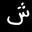

In [ ]:
convert_pixle_to_image(train_im.loc[100])

In [ ]:
#Image normalization 
train_image_scaled = train_im.values.astype("float32")/255
test_image_scaled = test_im.values.astype("float32")/255

train_label = train_label.values.astype('int32')
test_labels = test_labels.values.astype('int32')


In [ ]:
train_image_scaled.shape

(13440, 1024)

In [ ]:

train_label

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [28],
       [28],
       [28]], dtype=int32)

As train lables display, it is a Multi-classification problem and we have 28 classes

**We need to convert from integers format to binary format, So we will use One-Hot-Encoding**

In [ ]:
from tensorflow.keras.utils import to_categorical
train_label_encoded = to_categorical(train_label-1,num_classes=28)
test_labels_encoded = to_categorical(test_labels-1,num_classes=28)


In [ ]:
train_label_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# Reshape the Inputs 

In [ ]:
train_image_scaled = train_image_scaled.reshape([-1,32,32,1])
test_image_scaled = test_image_scaled.reshape([-1,32,32,1])

In [ ]:
print(train_image_scaled.shape)
print(train_label_encoded.shape)
print(test_image_scaled.shape)
print(test_labels_encoded.shape)

(13440, 32, 32, 1)
(13440, 28)
(3360, 32, 32, 1)
(3360, 28)


# Model Architecture 

In [ ]:
# base_model = MobileNet(weights='imagenet',include_top=False,classes=28,input_shape=(32,32,3))


In [ ]:
#base_model.summary()

In [ ]:
# max_pool = layers.MaxPooling2D(padding='same')
# flatten_layer = layers.Flatten()
# drop_1 = layers.Dropout(0.3)
# dense_layer_1= layers.Dense(512, activation='relu')

# prediction_layer = layers.Dense(28, activation='softmax')

In [ ]:
# model = models.Sequential([
#     base_model,
#     max_pool,
#     flatten_layer,
#     drop_1,
#     dense_layer_1,
#     prediction_layer
# ])

# model.compile(
#     optimizer= "adam",
#     loss='categorical_crossentropy',
#     metrics=['accuracy'],
# )

In [ ]:
# model.fit(train_image_scaled,epochs=5)

In [ ]:
def CNN_model(optimizer = 'adam',kernel_type = 'he_normal',activation_fun='relu'):

  model = Sequential()
  model.add(Conv2D(filters=16,kernel_size=3,padding='same',input_shape=(32,32,1),kernel_initializer=kernel_type,activation=activation_fun))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(filters=32,kernel_size=3,padding='same',kernel_initializer=kernel_type,activation=activation_fun))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(filters=64,kernel_size=3,padding='same',kernel_initializer=kernel_type,activation=activation_fun))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))
 
  model.add(Conv2D(filters=128,kernel_size=3,padding='same',kernel_initializer=kernel_type,activation=activation_fun))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))
  model.add(GlobalAveragePooling2D())

  #full connected layer
  model.add(Dense(28,activation='softmax'))


  #compile_model 
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return model







# Parameters Tuning

In [ ]:
np.random.seed(42)

# define the grid search parameters
optimizer = ['RMSprop', 'Adam', 'Adagrad', 'Nadam']
kernel_initializer = ['normal', 'uniform']
activation = ['relu', 'linear', 'tanh']

param_grid = dict(optimizer=optimizer, kernel_initializer=kernel_initializer, activation=activation)


# count number of different parameters values combinations
parameters_number = 1
for x in param_grid:
    parameters_number = parameters_number * len(param_grid[x]) 
print("Number of different parameter combinations = {}".format(parameters_number))


Number of different parameter combinations = 24


In [ ]:
epochs = 5
batch_size = 20 # 20 divides the training data samples

#creating the models with different hyperparameters
for a,b,c in [(x,y,z) for x in optimizer for z in activation for y in kernel_initializer]:
    params = {'optimizer' : a , 'kernel_initializer' : b , 'activation' : c}
    print(params)
    curr_model = CNN_model(a, b, c)
    curr_model.fit(train_image_scaled, train_label_encoded, 
                    validation_data=(test_image_scaled, test_labels_encoded),
                    epochs=epochs, batch_size=batch_size, verbose=1)
    print("=============================================================================")

{'optimizer': 'RMSprop', 'kernel_initializer': 'normal', 'activation': 'relu'}
Epoch 1/5
672/672 [==============================] - 16s 9ms/step - loss: 1.8322 - accuracy: 0.4312 - val_loss: 1.3825 - val_accuracy: 0.5310
Epoch 2/5
672/672 [==============================] - 6s 9ms/step - loss: 0.7318 - accuracy: 0.7528 - val_loss: 0.6884 - val_accuracy: 0.7667
Epoch 3/5
672/672 [==============================] - 6s 9ms/step - loss: 0.5461 - accuracy: 0.8168 - val_loss: 1.3094 - val_accuracy: 0.6003
Epoch 4/5
672/672 [==============================] - 6s 9ms/step - loss: 0.4451 - accuracy: 0.8495 - val_loss: 0.3518 - val_accuracy: 0.8929
Epoch 5/5
672/672 [==============================] - 6s 9ms/step - loss: 0.4148 - accuracy: 0.8605 - val_loss: 0.2725 - val_accuracy: 0.9196
{'optimizer': 'RMSprop', 'kernel_initializer': 'uniform', 'activation': 'relu'}
Epoch 1/5
672/672 [==============================] - 8s 9ms/step - loss: 1.6155 - accuracy: 0.4940 - val_loss: 0.7321 - val_accuracy: 0

**From above the best parameters are:**


1.   Optimizer: adam
2.   Activation: relu
3.   kernel_init: unifrom



In [ ]:
## model creation of best parameters 

model = CNN_model(optimizer = 'adam',kernel_type = 'uniform',activation_fun='relu')

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)
history = model.fit(train_image_scaled, train_label_encoded, 
                    validation_data=(test_image_scaled, test_labels_encoded),
                    epochs=30, batch_size=30, verbose=1,callbacks=[checkpointer])

Epoch 1/30
446/448 [============================>.] - ETA: 0s - loss: 0.0992 - accuracy: 0.9668
Epoch 1: val_loss improved from inf to 0.11176, saving model to weights.hdf5
448/448 [==============================] - 6s 13ms/step - loss: 0.0990 - accuracy: 0.9670 - val_loss: 0.1118 - val_accuracy: 0.9750
Epoch 2/30
445/448 [============================>.] - ETA: 0s - loss: 0.1009 - accuracy: 0.9668
Epoch 2: val_loss improved from 0.11176 to 0.10708, saving model to weights.hdf5
448/448 [==============================] - 4s 9ms/step - loss: 0.1009 - accuracy: 0.9669 - val_loss: 0.1071 - val_accuracy: 0.9705
Epoch 3/30
442/448 [============================>.] - ETA: 0s - loss: 0.1018 - accuracy: 0.9667
Epoch 3: val_loss did not improve from 0.10708
448/448 [==============================] - 4s 9ms/step - loss: 0.1018 - accuracy: 0.9669 - val_loss: 0.2181 - val_accuracy: 0.9342
Epoch 4/30
445/448 [============================>.] - ETA: 0s - loss: 0.0925 - accuracy: 0.9678
Epoch 4: val_loss

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
    # Loss Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)

    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['accuracy'],'r',linewidth=3.0)
    plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16) 

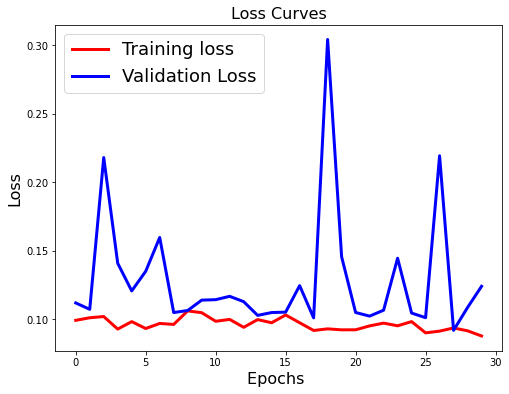

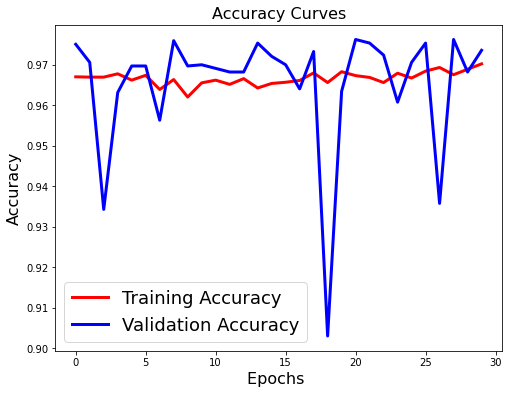

In [ ]:
plot_loss_accuracy(history)


In [ ]:
model.load_weights('weights.hdf5')


# Model Testing 

In [ ]:
# Final evaluation of the model
metrics = model.evaluate(test_image_scaled, test_labels_encoded, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

105/105 [==============================] - 1s 4ms/step - loss: 0.0917 - accuracy: 0.9762
Test Accuracy: 0.976190447807312
Test Loss: 0.09174273163080215


# Save the final model(Serialization)

In [ ]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load Json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# compile the loaded model
loaded_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

Loaded model from disk


# Image Class Prediction 

In [ ]:
def get_predicted_classes(model, data, labels=None):
    image_predictions = model.predict(data)
    predicted_classes = np.argmax(image_predictions, axis=1)
    true_classes = np.argmax(labels, axis=1)
    return predicted_classes, true_classes, image_predictions

In [ ]:
from sklearn.metrics import classification_report

def get_classification_report(y_true, y_pred):
    print(classification_report(y_true, y_pred))

In [ ]:
y_pred, y_true, image_predictions = get_predicted_classes(model, test_image_scaled, test_labels_encoded)
get_classification_report(y_true, y_pred)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       120
           1       1.00      0.99      1.00       120
           2       0.89      0.97      0.93       120
           3       0.97      0.93      0.95       120
           4       0.99      0.97      0.98       120
           5       0.97      0.98      0.98       120
           6       1.00      0.99      1.00       120
           7       0.95      0.97      0.96       120
           8       0.97      0.94      0.96       120
           9       0.93      0.99      0.96       120
          10       0.98      0.93      0.96       120
          11       1.00      1.00      1.00       120
          12       0.99      0.99      0.99       120
          13       0.97      0.99      0.98       120
          14       1.00      0.95      0.97       120
          15       0.94      1.00      0.97       120
          16       1.00      0.95      0.97       120
          17       0.98    

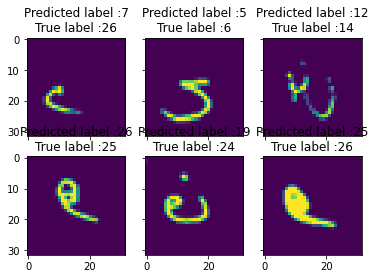

In [ ]:
errors = (y_pred - y_true != 0)


Y_pred_classes_errors = y_pred[errors]
Y_pred_errors = image_predictions[errors]
Y_true_errors = y_true[errors]
X_val_errors = test_image_scaled[errors]


def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            image_array = np.flip(img_errors[error], 0)
            image_array = rotate(img_errors[error], -90)
            ax[row,col].imshow((image_array).reshape((32,32)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted letters
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)